# Project Python Foundations: FoodHub Data Analysis

# By KAUDA AYODELE JIMOH

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### Checking the rows and columns that in the data

In [ ]:
df.shape

(1898, 9)

#### Observations:
The dataset has 1898 number of rows and 9 columns


###  The datatypes of the different columns in the dataset

In [ ]:
# Using info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   restaurant_name  178 non-null    object
dtypes: object(1)
memory usage: 1.5+ KB


#### Observations:
from the above information, we have 1 float, 4 integers and 4 objects. Rating has a wrong data type ,little adjustment may be made to correct it. Order id and customer id are categorical variables with numerical labels.

In [ ]:
#let check rating entries in the column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

'Not given' could be replaced with 0 to correct the error.



In [ ]:
# to correct the error 
df['rating'] = df['rating'].replace(['Not given'],0)

In [ ]:
df = df.astype({'rating': float, 'order_id': object, 'customer_id': object})

In [ ]:
#just to reconfirm that the datatype has changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


###  Checking the missing values in the datasets

The error has been fixed.

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: there is no missing value in the data set.


### Checking the statistical summary of the data. the minimum, average, and maximum time it takes for food to be prepared once an order is placed

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
rating,1898.0,2.659642,2.195280,0.00,0.00,4.00,5.0000,5.00
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### Observations: it takes a minimum of 20 minutes, an average of 27.37 minutes and a maximum of 35 minutes for the food to be prepared after an order.



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df["rating"].value_counts(dropna=False)

0.0    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

#### Observations: 736 orders were not rated. recall 0 has been used to represent 'Not given'.



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Exploring all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

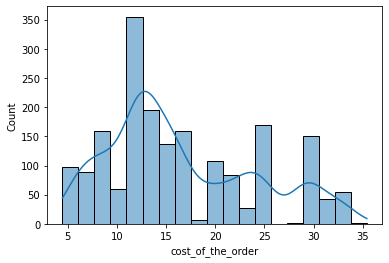

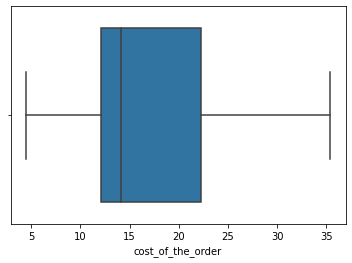

In [ ]:
%matplotlib inline 
sns.histplot(data = df,x='cost_of_the_order',kde=True)
plt.show()
sns.boxplot(data = df, x='cost_of_the_order')
plt.show();


The histplot is skewed to the right, while there is a slight peak at around 25 dollars. 
The boxplot indicates that the median cost is about 14 dollars, with the orders being right skewed, which is a spread above the median. 

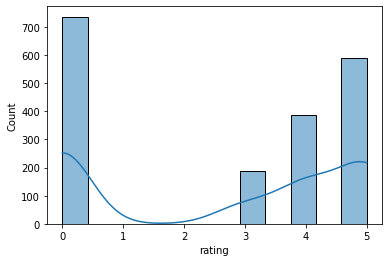

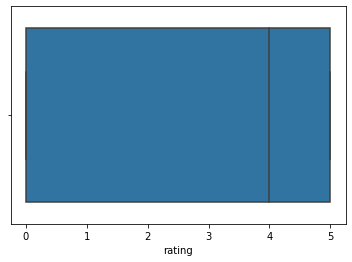

In [ ]:
#for rating
sns.histplot(data = df, x='rating', kde = True)
plt.show()
sns.boxplot(data = df, x='rating')
plt.show();

The histplot was skewed to the right and get to 0 due to the missing values, before it started rising, while the boxplot is greatly skewed to the left.

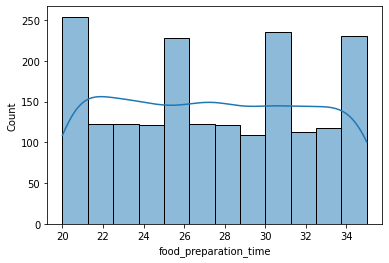

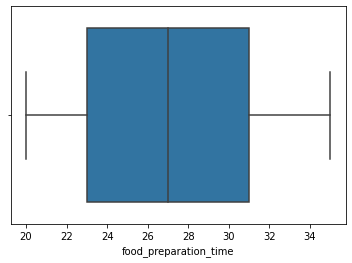

In [ ]:
sns.histplot(data = df, x='food_preparation_time',kde = True)
plt.show()
sns.boxplot(data = df, x='food_preparation_time')
plt.show();

There is a fairly even distribution of the time it takes to prepare the dish between 20 minutes and 36 minutes with a median of about 27 minutes


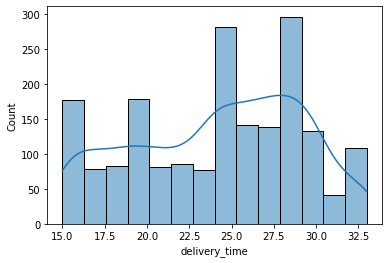

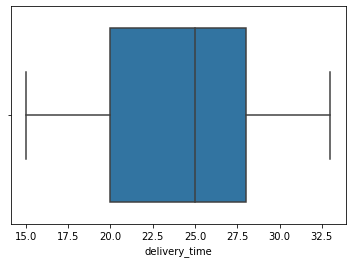

In [ ]:
sns.histplot(data = df, x='delivery_time',kde = True,)
plt.show()
sns.boxplot(data = df, x='delivery_time')
plt.show();


the histplot shows that most orders take between 25 and 28 minutes to be delivered, which is high.
The median delivery time is about 25 minutes with the observations being skewed to the left according to the boxplot

### The top 5 restaurants in terms of the number of orders received

In [ ]:
df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id',axis = 0,ascending=False).head(5)


,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: Shake Shack has the highest number with 219 orders, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parmhave have 132, 119, 96 and 68 orders respectively and together make up the top 5 restaurants in terms of orders processed



### The most popular cuisine on weekends

In [ ]:
df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)


,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


#### Observations: American Cuisine Type is the most popular during the weekends with a count of 415 orders.


### The percentage of the orders cost more than 20 dollars

In [ ]:
# total orders
total_observations = df['cost_of_the_order'].count()
# count of orders with cost above $20
orders_above20 = df['cost_of_the_order'][df['cost_of_the_order']> 20].count()
# Percent of the orders above $20
percentage_above20 = round((orders_above20/total_observations)*100,2) 
percentage_above20


29.24

#### Observations: 29.24% of Total orders cost more than 20 dollars


### The mean order delivery time

In [ ]:
df['delivery_time'].agg('mean')

24.161749209694417

#### Observations: the mean order delivery time is 24.16 to 2 decimal places.



### When the company has decided to give 20% discount vouchers to the top 5 most frequent customers. Finding the IDs of these customers and the number of orders they placed.

In [ ]:
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head()

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7


#### Observations: above finding reveals clients with the 5th highest order counts. 


### Multivariate Analysis

### Performing a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


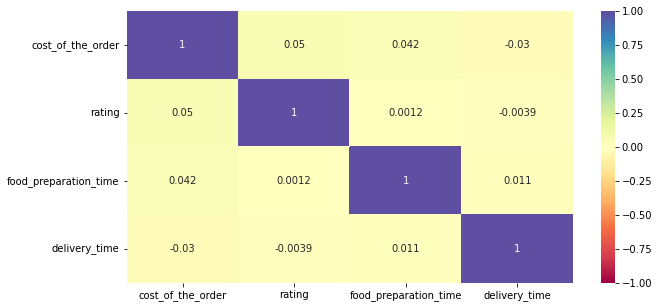

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()


the heatmap shows very weak correlation between the variables.


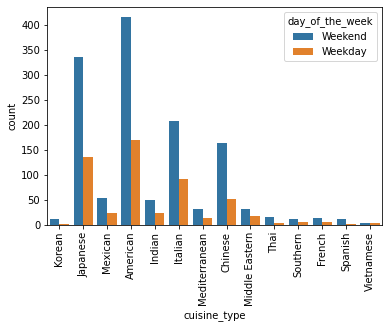

In [ ]:
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show();

the pattern are almost same every day and the demands were Low

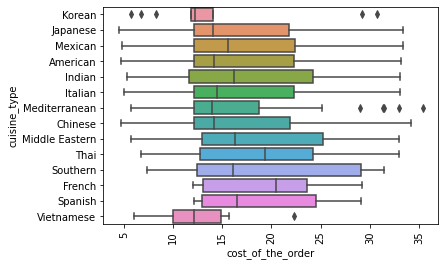

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
plt.xticks(rotation=90)
plt.show();


the cuisines have varying degrees of skewed costs and outliers


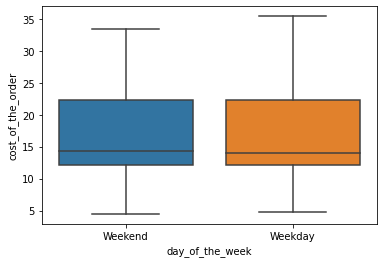

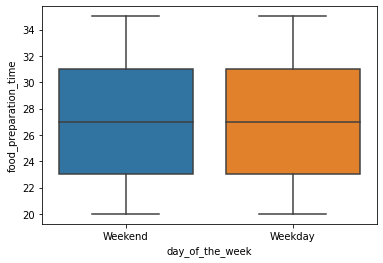

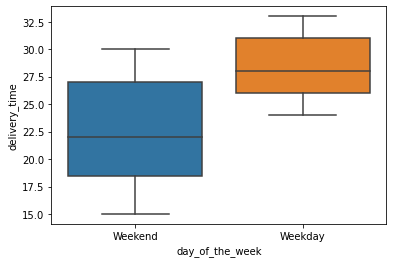

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order') 
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time') 
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time') 
plt.show()


Delivery time takes longer during the weekdays than during the weekends. The median delivery time for weekends is around 22.5 minutes while that of the weekdays is about 27.5 

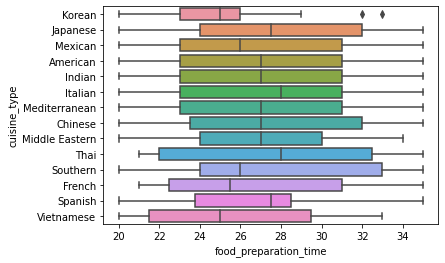

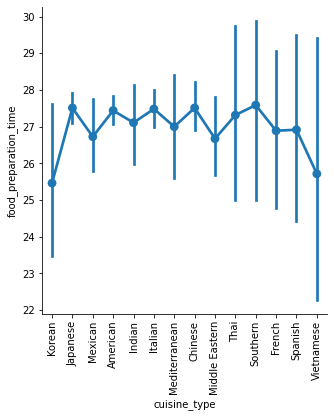

In [ ]:
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type')
plt.show()
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show()


There are irregular food preparation time.

### When the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Finding the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
#Creating a data set of Restaurants with a mean rating greater than 4. 
df2 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4  
#index reset
df2.reset_index(inplace=True)
# Create a data set of Restaurants with count of rating greate than 50.
df3 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50
#index reset
df3.reset_index(inplace=True)
# Set of Restaurants that meet both conditions above by merging df2 and df3
qualified_restaurants = pd.merge(df3[df3['rating']== True], df2[df2['rating']== True],on ='restaurant_name')
qualified_restaurants

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


#### Observations: 4 Restaurants get the promotional offer; Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop



### When the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Finding the net revenue generated by the company across all orders.

In [ ]:
#revenues variables
revenue = 0
income = 0
# Pandas series to determine cost of order column
cost = pd.Series(df['cost_of_the_order'])
# Loop through the series calculating the individual income component and adding it to the revenue variable 
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income
print('Net revenue generated is: ',revenue,'assuming no commission charged for orders with cost below $5')



Net revenue generated is:  6166.302999999994 assuming no commission charged for orders with cost below $5


#### Observations: FoodHub collected a total of $ 6163.3 to 2 dp for the orders



### When the company wants to analyze the total time required to deliver the food. The percentage of orders take more than 60 minutes to get delivered from the time the order is placed. (The food has to be prepared and then delivered.) 

In [ ]:
# Total time required
df['total_prep_time'] = df['food_preparation_time']+df['delivery_time']
# To confirm the new column
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_prep_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0.0,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0.0,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


#### Observations: the new column for total preparation time has been added.


In [ ]:
#Percentage of orders taking more than 60 minutes
total_observations = df['total_prep_time'].count()
ordertime_above60 = df['total_prep_time'][df['total_prep_time']> 60].count()
percent_above60 = round((ordertime_above60/total_observations)*100,2)
percent_above60

10.54

About 10.54% of orders take more than 60 minutes to prepare and get the food delivered.


### When the company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends

In [ ]:
# The code computes the mean delivery time based on the day of the week, however it includes other statistics that maybe useful
# for review alongside the mean
avr_del_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])
avr_del_time


delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

#### Observations:
The mean delivery time during the weekend is 22.47 minutes against the weekday delivery time of 28.34. the mean delivery time on weekday is higher than weekend.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Some customers gave a rating of 5, which shows the extent to which they were satisfied while about 30%or more customer did not gave rating which madw it difficult to determine their opinions.

There was demand all through the week with increase on weekend. 
Preparation time was consistent with to delivery time.

The cost of orders was apex at around 13 dollars and there was a little peak around 25 dollars making the observations bimodal.

Moreover, four restaurants got the promotional offer.

### Recommendations:

The customers should be advised to always give their rating of the orders to have a better opinion of them for data analysis purpose, and to also know the entent to which they are satisfied with the service received.

Weekend sales are higher than weekdays, therefore efforts should be made to increase weekdays sales, possibly through advertising.

To improve on total order time a review on how to bring down delivery time can be considered to improve on overall service. if the total order time is reduced, more customers may want to show interest in the company services as a result of fast delivery.

The organization should consider a tie-breaker for cases where customers have the same score on promotional offer. A decision may be made to reward all of them considering the financial benefit.

---